### show an example of image and label

In [18]:
import idx2numpy
from scipy import ndimage
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [43]:
images = idx2numpy.convert_from_file(open('train-images.idx3-ubyte', 'rb'))
labels = idx2numpy.convert_from_file(open('train-labels.idx1-ubyte', 'rb'))

In [4]:
def Show(n):
    plt.imshow(images[n], cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()
    print "NUMBER"
    print labels[n]

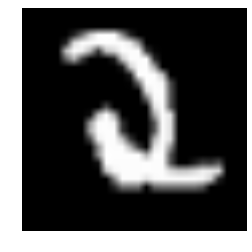

NUMBER
2


In [5]:
Show(400)

----------

### create a train test split

In [6]:
from sklearn.decomposition import RandomizedPCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

In [7]:
data = []
for im in images:
    b=[]
    for row in im:
        for d in row:
            b.append(d)
    data.append(b)

In [8]:
pca = RandomizedPCA(n_components=10)
std_scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

------